Simulated annealing basically emulates how nature finds the minimum energy state of a system as temperature drops.

We may use this algorithm to find the minimum (or the maximum) of a function stochastically. 

Maybe you should also check how much the eccepted x changes compared to the proposed ones. 
Basically, compare variances and see whether the eccepted ones are more confined. Then you 
can stop!

In [1]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
class SimulatedAnnealing:
    def __init__(self, func, dim , x0 ,  T0, k, IterationT, MinT, sigma, tol, Nstar, p0,N0,k0):
        '''
        func: the function to be minimized
        
        dim: the number of arguments that func takes
        
        x0: starting point
        
        k: to be used for the temperature update
        
        IterationT: number of iterations per temperature
        
        MinT:  stop when the temperature becomes MinT
        sigma: new neighbours are found between x+N(0,sigma)
        
        tol,Nstar: SA Stops when the acceptance probability is below tol for Nstar successive iterations
        
        To initialize the temperature:
        p0,N0,k0: increase the temperature as T->T*k0 until the acceptance probability is larger that p0
        for N0 successive iterations
        '''
        
        self.func=func
        self.dim=dim
        self.x=x0
        self.T=T0
        self.k=k
        
        self.IterationT=IterationT
        self.MinT=MinT
        self.sigma=sigma
        self.tol=tol
        self.Nstar=Nstar
        
        self.p0=p0
        self.N0=N0
        self.k0=k0
        
        self.E=self.func(x0)
            
    def nextT(self):
        '''Update the temperature'''
#         self.T=self.T/(1+k*self.T)
        self.T*=self.k
        
    def PickNeighbour(self):
        '''Pick a neighbour'''
        x=[]
        for d in range(dim):
            x.append(np.random.rand()*sigma[d]-sigma[d]/2) 
        x=np.array(x)
        return self.x+x
#         return self.x+np.random.normal(self.sigma,size=self.dim)#the normal seems to work nicely. 
            
    
    def BoltzmannP(self,Enew):
        '''Given a new value of the energy, return the Boltzmann factor'''
        return np.exp(-(Enew-self.E)/self.T)
    
        
    
    
    def runT(self):
        #use these to find the mean Delta E for a temperature 
        self.AccProb=0
        
        for _ in range(self.IterationT):
            xnew=self.PickNeighbour()
            Enew=self.func(xnew)
            
            
            if Enew<self.E or self.BoltzmannP(Enew) > np.random.rand():
                self.AccProb+=1
                self.E=Enew
                self.x=xnew
                
        self.AccProb=self.AccProb/self.IterationT

        
    def InitT(self):
        '''Find an appropriace initial temperature'''
        IterT0=0
        
        while IterT0<self.N0:
            self.runT()
           
            if self.AccProb>self.p0:
                IterT0+=1
            
            if self.AccProb<self.p0 and IterT0>0:
                IterT0=0
            
            self.T*=self.k0
                

        
       
    def run(self, CList=False):
        '''
        Iterate until the temperature reaches MinT or until it reaches convergence (Nstart times with AccProb<tol)
        CList=True stores acceptance probabilities, IterConv, E values for all temperatures 
        in self.ListProb self.ListIC, self.ListE
        '''
        #run to find initial temperature that has large acceptance probability 
        self.InitT()
        
        IterConv=0
        
        if CList:
            self.ListProb=[]
            self.ListIC=[]
            self.ListE=[]
        
        self.points=[]
        while self.T>self.MinT and self.Nstar>IterConv:
            self.runT()

            if self.AccProb<self.tol:
                IterConv+=1
                self.points.append(self.x)
            
            if self.AccProb>self.tol and IterConv>0:
                IterConv=0
                self.points=[]
            
            
            if CList:
                self.ListProb.append(self.AccProb)
                self.ListIC.append(IterConv)
                self.ListE.append(self.E)
            
            
            
            self.nextT()
            
        self.points=np.array(self.points)
        return self.x,self.E

                        

In [3]:
def f(x):
#     return (x[0]-3)**4+(x[1]-1)**2+(x[2]+50)**2
    return (5-x[0])**2+300*(x[1]-x[0]**2)**2
#     return -np.exp(-(x[0]-1)**2)*np.sin(np.pi*x[0])*5+2
#     return np.sum(x**2)



In [4]:
#a good approach is to run once with a large sigma, and once it 
# converges run with a smaller one starting from the last point
# and a higher temperature.

dim=2

#first run
x0= np.random.rand(dim)*5-2.5
k=1-5e-3
T0=np.abs(f(x0))*10+1
IterationT=50
MinT=0#1e-50
sigma=[1e-1 for d in range(dim)]
tol=1e-5
Nstar=50

p0=0.8
N0=100
k0=1.1

SA=SimulatedAnnealing(f, dim , x0 ,  T0, k, IterationT, MinT,sigma,tol,Nstar,p0,N0,k0)
print(SA.run(True),
      '\n\n T=',
       SA.T)

ListE=np.array(SA.ListE)
ListProb=np.array(SA.ListProb)

#second run
x0=SA.x
k=0.95
T0=T0*1e4
IterationT=150
MinT=0#1e-50

sigma=[ 1e-3+ np.var(SA.points[:,i])**0.5 for i in range(dim)]

# print(sigma)

tol=1e-5
Nstar=500

p0=0
N0=0
k0=1.1

SA=SimulatedAnnealing(f, dim , x0 ,  T0, k, IterationT, MinT,sigma,tol,Nstar,p0,N0,k0)

print(SA.run(True),
      '\n\n T=',
       SA.T)


ListE=np.append(ListE,SA.ListE)
ListProb=np.append(SA.ListProb,SA.ListProb)


(array([ 4.96668467, 24.6679192 ]), 0.0011103314124259317) 

 T= 5.75462874534185e-08
(array([ 5.00000153, 25.00001506]), 2.0115422376540474e-11) 

 T= 3.10012430368907e-62


<IPython.core.display.Javascript object>


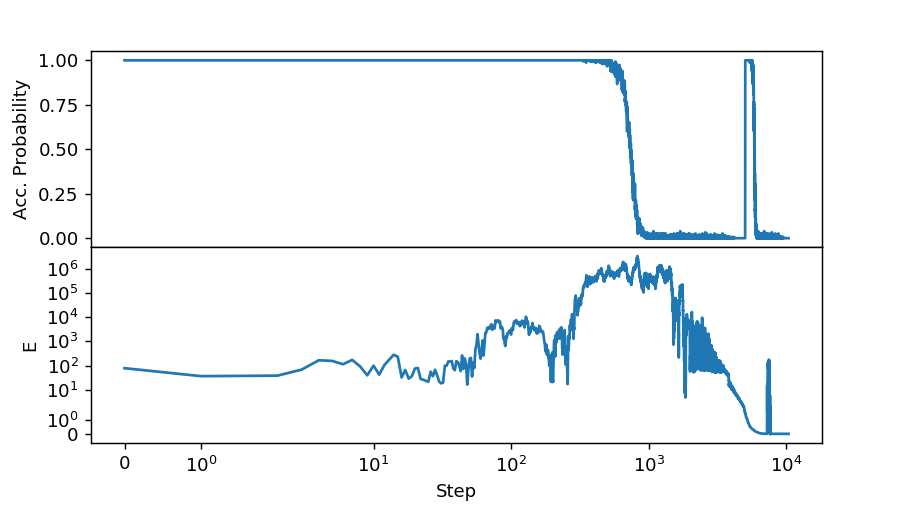

In [5]:
fig=plt.figure(figsize=(7,4))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.plot(ListProb)

sub.set_xscale('symlog')
# sub.set_yscale('symlog')
sub.set_ylabel('Acc. Probability')
sub.get_xaxis().set_visible(False)


sub = fig.add_subplot(212)
sub.plot(ListE)

sub.set_xscale('symlog')
sub.set_yscale('symlog')



sub.set_xlabel('Step')
sub.set_ylabel('E')


plt.show()